In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [7]:
X_train, X_test = [], []
Y_train, Y_test = [], []
for i in range(1,41):
    for j in range(1,10):
        img = cv2.imread('data/{}_{}.png'.format(i,j), cv2.IMREAD_GRAYSCALE)
        X_train.append(img)
        Y_train.append(i)
    img = cv2.imread('data/{}_10.png'.format(i), cv2.IMREAD_GRAYSCALE)
    X_test.append(img)
    Y_test.append(i)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(360, 56, 46) (360,)
(40, 56, 46) (40,)


## 1. mean face & first four eigenfaces

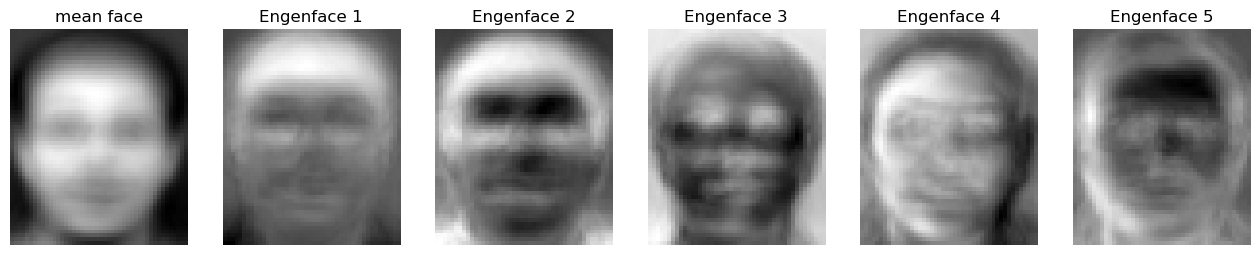

In [17]:
pca = PCA()
pca.fit(X_train.reshape(len(Y_train), -1))

plt.figure(figsize=(16,12))
plt.subplot(1,6,1)
plt.axis('off')
plt.title("mean face")
plt.imshow(pca.mean_.reshape(X_train[0].shape), cmap='gray')

for i in range(5):
    plt.subplot(1,6,i+2)
    plt.axis('off')
    plt.title("Engenface {}".format(i+1))
    plt.imshow(pca.components_[i].reshape(X_train[0].shape), cmap='gray')

plt.show()

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

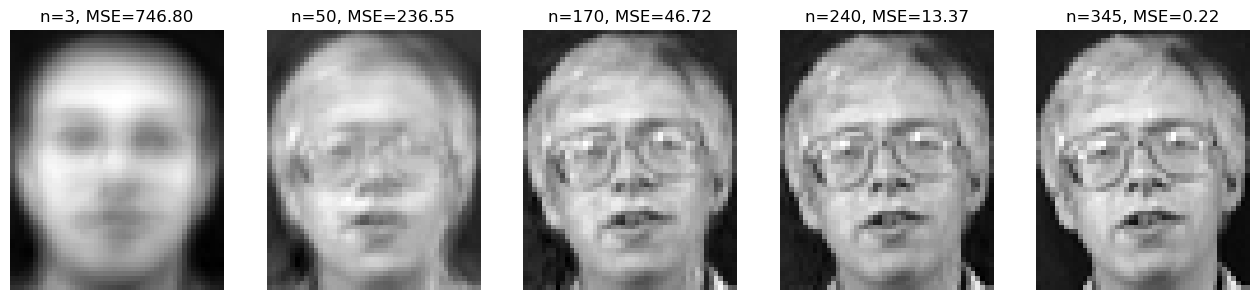

In [21]:
img = cv2.imread('data/2_1.png', cv2.IMREAD_GRAYSCALE).reshape(1, -1)
a = pca.transform(img)

plt.figure(figsize=(16,12))
n_components = [3,50,170,240,345]
for i,n in enumerate(n_components):
    face = np.zeros(img.shape)
    for j in range(n):
        face = face + a[0][j]*pca.components_[j]
    face = face+pca.mean_
    MSE = np.mean((face-img)**2)
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.title("n={}, MSE={:.2f}".format(n,MSE))
    plt.imshow(face.reshape(X_train[0].shape), cmap='gray')

## 4. cross-validation results

In [25]:
reduced_X_train = pca.transform(X_train.reshape(len(Y_train), -1))
K=[1,3,5]
N=[3,50,170]
random=np.random.permutation(len(Y_train))
reduced_X_train = reduced_X_train[random]
Y_train_random = Y_train[random]
for k in K:
    print("K={}".format(K))
    knn = KNeighborsClassifier(n_neighbors=k)
    for n in N:
        print('n={},'.format(n), end='')
        score = cross_val_score(knn, reduced_X_train[:, :n], Y_train_random, cv=3)
        print('score={:.4f}'.format(score.mean()))

K=[1, 3, 5]
n=3,score=0.7333
n=50,score=0.9667
n=170,score=0.9611
K=[1, 3, 5]
n=3,score=0.6361
n=50,score=0.9139
n=170,score=0.9056
K=[1, 3, 5]
n=3,score=0.5694
n=50,score=0.8722
n=170,score=0.8611


## 5. recognition rate of the testing set

In [33]:
k=1
n=50

reduced_X_test = pca.transform(X_test.reshape(len(Y_test), -1))

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_X_train[:, :n], Y_train_random)

print('aeaccuracy = {}'.format(knn.score(reduced_X_test[:, :n], Y_test)))

aeaccuracy = 0.925
